In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as plt

In [5]:
train= pd.read_csv('train.csv')
train.head(5)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test=pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train.loc[train.Sex =='female']["Survived"]
rate_women=sum(women)/len(women)
#print(women)
print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [17]:
men=train.loc[train.Sex == "male"]["Survived"]
rate_men=sum(men)/len(men)

print("% of men who survived: ", rate_men)

% of men who survived:  0.18890814558058924


In [6]:
print('Count of Survived')
print(train['Survived'].value_counts())

Count of Survived
0    549
1    342
Name: Survived, dtype: int64


In [7]:
print(train['Survived'].value_counts(normalize=True)*100)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

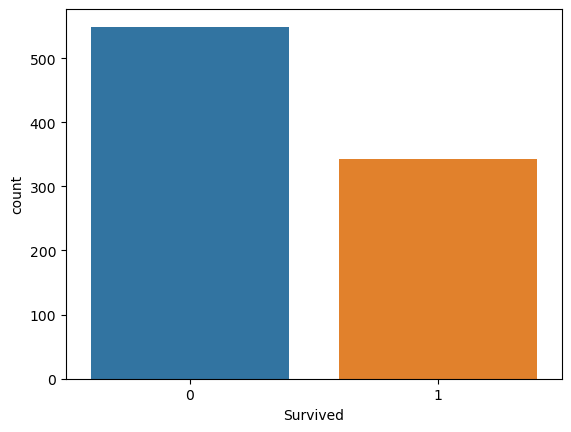

In [10]:
#countplot
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

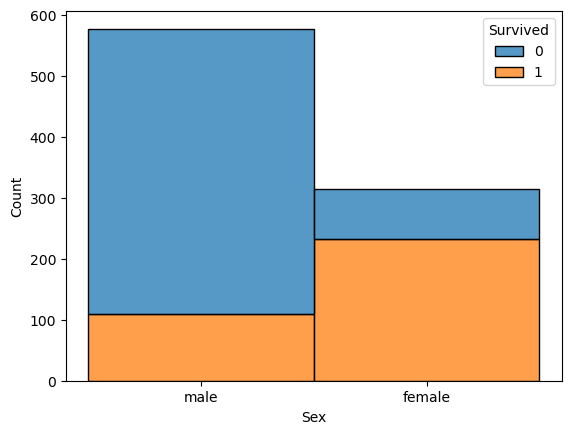

In [13]:
sns.histplot(train, x="Sex", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

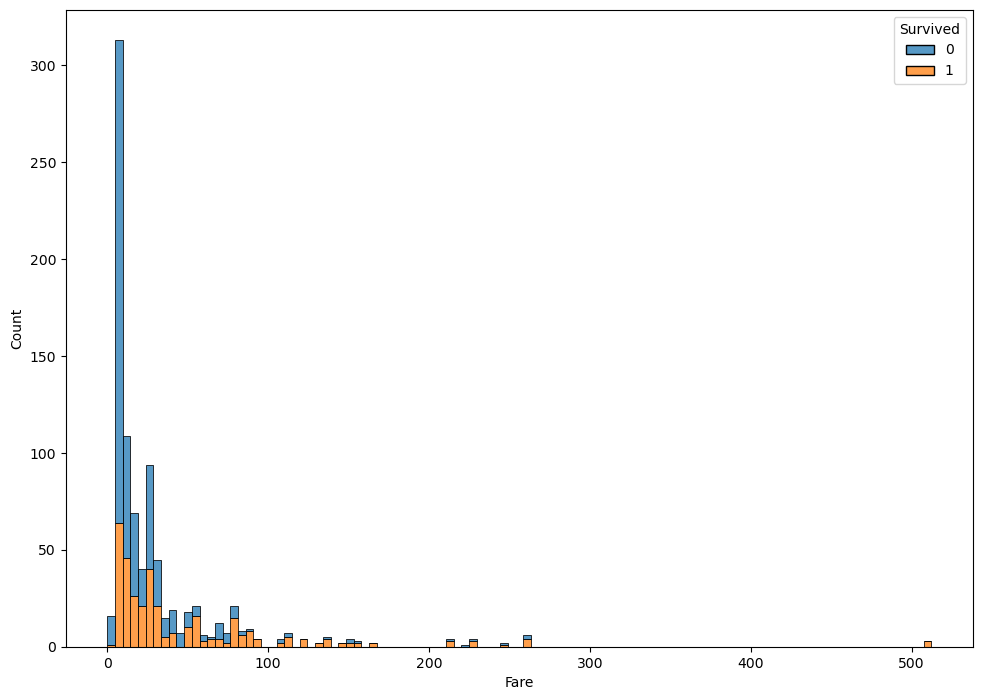

In [15]:
from matplotlib import rcParams

rcParams['figure.figsize']=11.7,8.27
sns.histplot(train, x="Fare", hue="Survived", multiple="stack")

In [16]:
from sklearn.ensemble import RandomForestClassifier

y=train["Survived"]
features=["Pclass", "Sex", "SibSp", "Parch"]
X=pd.get_dummies(train[features])
X_test=pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



In [18]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.describe()
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.354067
std,120.810458,0.478803
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()